# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Yusfi Syawali
- **Email:** yusfisyawali@mhs.unimed.ac.id
- **ID Dicoding:** yusfi_syawali_dcqy

## Menentukan Pertanyaan Bisnis

Berikut Beberapa pertanyaan Bisnis yang di ajukan:

- 1) Bagaimana pola penggunaan sepeda berdasarkan waktu (harian dan per jam)?
- 2) Apa faktor-faktor utama yang memengaruhi jumlah penyewaan sepeda?
- 3) Apakah cuaca memiliki pengaruh signifikan terhadap penggunaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [300]:
# Import library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [301]:
# Membaca dataset
day_data = pd.read_csv('bike_dataset/day.csv')
hour_data = pd.read_csv('bike_dataset/hour.csv')

In [302]:
# Melihat struktur dataset day_data
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [303]:
# Melihat struktur dataset hour_data
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [304]:
# Mengecek informasi dasar tentang dataset
print("Informasi dataset harian:")
day_data.info()

print("\nInformasi dataset per jam:")
hour_data.info()

Informasi dataset harian:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

Informasi dataset per jam:
<class 'pandas.core.frame.DataFrame'>
R

In [305]:
# Menampilkan deskripsi masing-masing fitur/variabel dalam dataset harian
# Menyimpan informasi fitur dalam bentuk dictionary
feature_info = {
    "Fitur": day_data.columns,
    "Tipe Data": [day_data[col].dtype for col in day_data.columns],
    "Sampel Nilai Dalam Fitur": [day_data[col].unique()[:12] for col in day_data.columns]
}

# Membuat DataFrame
feature_day = pd.DataFrame(feature_info)

# Mencetak tabel
print("Deskripsi Masing-masing Fitur di dataset harian:")
print(feature_day.to_string(index=False))


Deskripsi Masing-masing Fitur di dataset harian:
     Fitur Tipe Data                                                                                                                         Sampel Nilai Dalam Fitur
   instant     int64                                                                                                          [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    dteday    object [2011-01-01, 2011-01-02, 2011-01-03, 2011-01-04, 2011-01-05, 2011-01-06, 2011-01-07, 2011-01-08, 2011-01-09, 2011-01-10, 2011-01-11, 2011-01-12]
    season     int64                                                                                                                                     [1, 2, 3, 4]
        yr     int64                                                                                                                                           [0, 1]
      mnth     int64                                                                                                     

In [306]:
# Menampilkan deskripsi masing-masing fitur/variabel dalam dataset per jam
# Menyimpan informasi fitur dalam bentuk dictionary
feature_info = {
    "Fitur": hour_data.columns,
    "Tipe Data": [hour_data[col].dtype for col in hour_data.columns],
    "Sampel Nilai Dalam Fitur": [hour_data[col].unique()[:24] for col in hour_data.columns]
}

# Membuat DataFrame
feature_hour = pd.DataFrame(feature_info)

# Mencetak tabel
print("Deskripsi Masing-masing Fitur di dataset per jam:")
print(feature_hour.to_string(index=False))


Deskripsi Masing-masing Fitur di dataset per jam:
     Fitur Tipe Data                                                                                                                                                                                                                                                                         Sampel Nilai Dalam Fitur
   instant     int64                                                                                                                                                                                                          [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
    dteday    object [2011-01-01, 2011-01-02, 2011-01-03, 2011-01-04, 2011-01-05, 2011-01-06, 2011-01-07, 2011-01-08, 2011-01-09, 2011-01-10, 2011-01-11, 2011-01-12, 2011-01-13, 2011-01-14, 2011-01-15, 2011-01-16, 2011-01-17, 2011-01-18, 2011-01-19, 2011-01-20, 2011-01-21, 2011-01-22, 2011-01-23, 2011-01-24]
    season     int64

**Insight:**

Berikut adalah penjelasan dari masing-masing kolom dalam dataset **day_data** dan **hour_data** berdasarkan strutur dataset diatas:

### Kolom-kolom dalam **day_data**
1. **instant**: Merupakan indeks unik untuk setiap baris data, berfungsi sebagai identifier.
2. **dteday**: Tanggal data yang tercatat (format: YYYY-MM-DD).
3. **season**: Musim pada saat data diambil, dengan nilai numerik:
   - 1 = Musim semi
   - 2 = Musim panas
   - 3 = Musim gugur
   - 4 = Musim dingin
4. **yr**: Tahun pengamatan:
   - 0 = Tahun pertama (2011)
   - 1 = Tahun kedua (2012)
5. **mnth**: Bulan dalam setahun (1-12).
6. **holiday**: Status apakah hari tersebut adalah hari libur nasional:
   - 0 = Bukan hari libur
   - 1 = Hari libur
7. **weekday**: Hari dalam minggu (0-6):
   - 0 = Minggu
   - 1 = Senin
   - ...
   - 6 = Sabtu
8. **workingday**: Status apakah hari tersebut adalah hari kerja (bukan libur atau akhir pekan):
   - 0 = Bukan hari kerja
   - 1 = Hari kerja
9. **weathersit**: Kondisi cuaca pada hari tersebut, dengan kategori:
   - 1 = Cuaca cerah/berawan
   - 2 = Mendung
   - 3 = Hujan ringan/salju ringan
   - 4 = Hujan lebat/salju lebat
10. **temp**: Suhu udara dalam skala normalisasi (0-1), dengan nilai asli dalam derajat Celsius.
11. **atemp**: Suhu yang dirasakan (apparent temperature) dalam skala normalisasi (0-1).
12. **hum**: Kelembaban relatif udara dalam skala normalisasi (0-1).
13. **windspeed**: Kecepatan angin dalam skala normalisasi (0-1).
14. **casual**: Jumlah pengguna sepeda yang tidak terdaftar (casual users).
15. **registered**: Jumlah pengguna sepeda yang terdaftar (registered users).
16. **cnt**: Total jumlah pengguna sepeda pada hari tersebut (casual + registered).

---

### Kolom-kolom dalam **hour_data**
Sebagian besar kolom memiliki arti yang sama dengan dataset **day_data**, namun ada tambahan kolom:
1. **hr**: Jam dalam sehari (0-23), menunjukkan waktu pengamatan per jam.
   
Kolom lainnya seperti **instant**, **dteday**, **season**, **yr**, **mnth**, **holiday**, **weekday**, **workingday**, **weathersit**, **temp**, **atemp**, **hum**, **windspeed**, **casual**, **registered**, dan **cnt** memiliki arti yang sama seperti dalam dataset **day_data**.


In [307]:
# Menampilkan statistik deskriptif dataset harian
print("Statistik deskriptif dataset harian:")
day_data.describe()

Statistik deskriptif dataset harian:


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [308]:
# Menampilkan statistik deskriptif dataset per jam
print("Statistik deskriptif dataset per jam:")
hour_data.describe()

Statistik deskriptif dataset per jam:


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Insight Ringkas dari Dataset

#### **Dataset Harian**
1. **Pengguna Sepeda**: Rata-rata **4504** pengguna per hari, dengan pengguna terdaftar (**3656**) lebih dominan dibanding kasual (**848**).
2. **Faktor Cuaca**: Sebagian besar hari memiliki cuaca baik hingga mendung (kategori 1 dan 2).
3. **Suhu dan Kelembaban**: Rata-rata suhu normalisasi **0.49** dan kelembaban **0.62**, dengan variasi kecil.
4. **Hari Kerja**: Sebagian besar data berasal dari hari kerja (68%).

#### **Dataset Per Jam**
1. **Pengguna Sepeda**: Rata-rata **189** pengguna per jam. Puncak aktivitas kemungkinan terjadi pagi atau sore.
2. **Pengguna Terdaftar vs Kasual**: Pengguna terdaftar dominan (**153**) dibanding kasual (**35**) per jam.
3. **Faktor Cuaca**: Sebagian besar waktu memiliki cuaca baik hingga mendung.
4. **Jam Operasi**: Data mencakup semua jam (0-23), menunjukkan potensi analisis pola waktu.

#### **Kesimpulan Utama**
- **Pengguna terdaftar mendominasi** baik dalam dataset harian maupun per jam.
- **Cuaca dan hari kerja** memainkan peran penting dalam penggunaan sepeda.
- Dataset per jam memungkinkan analisis waktu puncak, sedangkan dataset harian lebih baik untuk tren umum.

In [309]:
# Mengecek jumlah nilai kosong pada dataset harian
print("Cek nilai kosong pada dataset harian:")
day_data.isnull().sum()

Cek nilai kosong pada dataset harian:


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [310]:
# Mengecek jumlah nilai kosong pada dataset per jam
print("Cek nilai kosong pada dataset per jam:")
hour_data.isnull().sum()

Cek nilai kosong pada dataset per jam:


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [311]:
# Mengecek apakah ada duplikasi data pada dataset harian
print("Cek duplikasi data pada dataset harian:")
day_data.duplicated().sum()

Cek duplikasi data pada dataset harian:


0

In [312]:
# Mengecek apakah ada duplikasi data pada dataset per jam
print("Cek duplikasi data pada dataset per jam:")
hour_data.duplicated().sum()

Cek duplikasi data pada dataset per jam:


0

### **Insight:**
- kedua dataset tidak memeiliki nilai kosong
- kedua dataset tidak memiliki nilai duplikat

### Cleaning Data

In [313]:
# Membersihkan data jika ditemukan nilai kosong (placeholder jika diperlukan)
# sebenarnya tidak perlu karena saat assesing data sudah di cek tidak ada nilai kosong nya
day_data.dropna(inplace=True)
hour_data.dropna(inplace=True)

# Menghapus kolom yang tidak relevan untuk analisis
irrelevant_columns = ['instant']  # Sesuai kebutuhan analisis
day_data_cleaned = day_data.drop(columns=irrelevant_columns, errors='ignore')
hour_data_cleaned = hour_data.drop(columns=irrelevant_columns, errors='ignore')

# kedua dataframe akan diubah tipe data pada colum 'dteday' menjadi tipe data 'datetime'
dteday_cols = ["dteday"]
for column in dteday_cols:
    day_data_cleaned[column] = pd.to_datetime(day_data_cleaned[column])
    
for column in dteday_cols:
    hour_data_cleaned[column] = pd.to_datetime(hour_data_cleaned[column])


# Memastikan data bersih
print("\nKolom dataset harian setelah pembersihan:")
print(day_data_cleaned.columns)
print("\nKolom dataset per jam setelah pembersihan:")
print(hour_data_cleaned.columns)



Kolom dataset harian setelah pembersihan:
Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

Kolom dataset per jam setelah pembersihan:
Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [314]:
hour_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  int64         
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  int64         
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), 

**Insight:**
- Kolom seperti 'casual' dan 'registered' dihapus karena fokus analisis pada total penyewaan (cnt).
- Data sudah bersih dan siap untuk analisis eksplorasi lebih lanjut.

In [315]:
# Salin dataframe awal perjam
all_data_hour = hour_data_cleaned.copy()

# Ubah kolom 'yr' menjadi tahun menggunakan replace dan tetap integer 
all_data_hour['year'] = all_data_hour['yr'].replace([0, 1], ['2011', '2012']).astype('int64')

# Ubah kolom 'mnth' menjadi nama bulan menggunakan pandas mapping function
all_data_hour['month'] = all_data_hour['mnth'].apply(
    lambda x: ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December'][x - 1]
)

# Tambahkan nama hari dari kolom tanggal
all_data_hour['weekday'] = all_data_hour['dteday'].dt.day_name()

# Ubah kolom 'season' menjadi nama musim menggunakan numpy select
all_data_hour['season'] = np.select(
    [all_data_hour['season'] == 1, all_data_hour['season'] == 2, 
     all_data_hour['season'] == 3, all_data_hour['season'] == 4],
    ['Spring', 'Summer', 'Autumn', 'Winter']
)

# Ubah kolom 'weathersit' menjadi deskripsi cuaca menggunakan dictionary map
weather_mapping = {
    1: 'Clear',
    2: 'Partly Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
}
all_data_hour['weather_description'] = all_data_hour['weathersit'].map(weather_mapping)

# Pilih hanya kolom yang diperlukan
all_data_hour = all_data_hour.loc[:, [
    'dteday', 'year', 'month', 'hr', 'weekday', 
    'season', 'weather_description', 'cnt', 'registered', 'casual', 'temp'
]]

# Cetak hasil akhir
all_data_hour.head()



,dteday,year,month,hr,weekday,season,weather_description,cnt,registered,casual,temp
0,2011-01-01,2011,January,0,Saturday,Spring,Clear,16,13,3,0.24
1,2011-01-01,2011,January,1,Saturday,Spring,Clear,40,32,8,0.22
2,2011-01-01,2011,January,2,Saturday,Spring,Clear,32,27,5,0.22
3,2011-01-01,2011,January,3,Saturday,Spring,Clear,13,10,3,0.24
4,2011-01-01,2011,January,4,Saturday,Spring,Clear,1,1,0,0.24


In [316]:
# Salin dataframe awal perhari
all_data_day = day_data_cleaned.copy()
# Ubah kolom 'yr' menjadi tahun menggunakan replace
all_data_day['year'] = all_data_day['yr'].replace([0, 1], ['2011', '2012'])

# Ubah kolom 'mnth' menjadi nama bulan menggunakan pandas mapping function
all_data_day['month'] = all_data_day['mnth'].apply(
    lambda x: ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December'][x - 1]
)

# Tambahkan nama hari dari kolom tanggal
all_data_day['weekday'] = all_data_day['dteday'].dt.day_name()

# Ubah kolom 'season' menjadi nama musim menggunakan numpy select
all_data_day['season'] = np.select(
    [all_data_day['season'] == 1, all_data_day['season'] == 2, 
     all_data_day['season'] == 3, all_data_day['season'] == 4],
    ['Spring', 'Summer', 'Autumn', 'Winter']
)

# Ubah kolom 'weathersit' menjadi deskripsi cuaca menggunakan dictionary map
weather_mapping = {
    1: 'Clear',
    2: 'Partly Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
}
all_data_day['weather_description'] = all_data_day['weathersit'].map(weather_mapping)

# Pilih hanya kolom yang diperlukan
all_data_day = all_data_day.loc[:, [
    'dteday', 'year', 'month', 'weekday', 
    'season', 'weather_description', 'cnt', 'registered', 'casual', 'temp'
]]

# Cetak hasil akhir
all_data_day.head()


,dteday,year,month,weekday,season,weather_description,cnt,registered,casual,temp
0,2011-01-01,2011,January,Saturday,Spring,Partly Cloudy,985,654,331,0.344167
1,2011-01-02,2011,January,Sunday,Spring,Partly Cloudy,801,670,131,0.363478
2,2011-01-03,2011,January,Monday,Spring,Clear,1349,1229,120,0.196364
3,2011-01-04,2011,January,Tuesday,Spring,Clear,1562,1454,108,0.200000
4,2011-01-05,2011,January,Wednesday,Spring,Clear,1600,1518,82,0.226957


In [317]:
# save data
all_data_day.to_csv('bike_dataset/all_data_day.csv', index=False)
all_data_hour.to_csv('bike_dataset/all_data_hour.csv', index=False)

## Exploratory Data Analysis (EDA)

### Explore ...

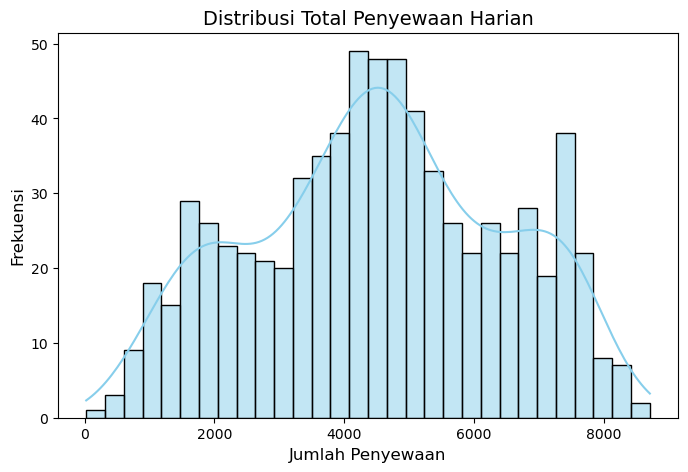

In [318]:
# Menjelajahi distribusi total penyewaan sepeda data harian
plt.figure(figsize=(8, 5))
sns.histplot(all_data_day['cnt'], kde=True, bins=30, color='skyblue')
plt.title('Distribusi Total Penyewaan Harian', fontsize=14)
plt.xlabel('Jumlah Penyewaan', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.show()

**Insight Distribusi Total Penyewaan Harian:**
- **Distribusi Penyewaan**: Jumlah penyewaan harian cenderung mengikuti distribusi normal, dengan mayoritas berada di kisaran **4000-6000 penyewaan** per hari. Ini menunjukkan tingkat penggunaan yang konsisten.

- **Outlier Potensial**: Ada beberapa hari dengan jumlah penyewaan ekstrem (di bawah 2000 dan di atas 8000), yang bisa dianalisis lebih lanjut untuk faktor penyebab seperti cuaca, hari libur, atau event tertentu.

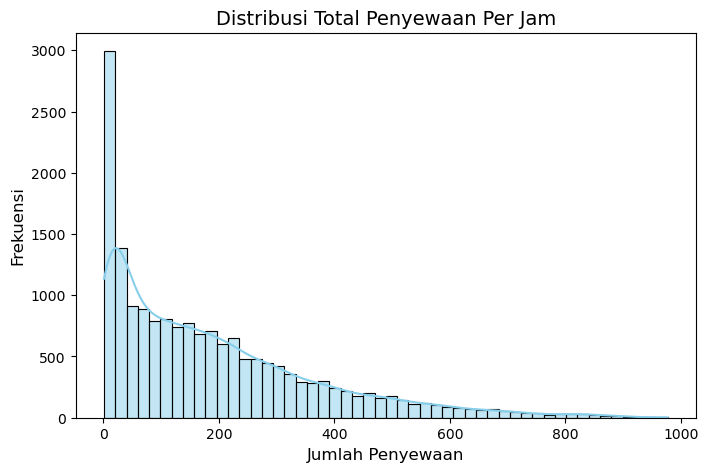

In [319]:
# Menjelajahi distribusi total penyewaan sepeda data per jam
plt.figure(figsize=(8, 5))
sns.histplot(all_data_hour['cnt'], kde=True, bins=50, color='skyblue')
plt.title('Distribusi Total Penyewaan Per Jam', fontsize=14)
plt.xlabel('Jumlah Penyewaan', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.show()


**Insight dari Histogram**
1. **Distribusi Data**:
   - Data jumlah penyewaan per jam terlihat memiliki distribusi yang sangat miring ke kanan (right-skewed). 
   - Ada banyak nilai kecil di sekitar 0–100, menunjukkan bahwa sebagian besar waktu jumlah penyewaan rendah.

2. **Puncak Distribusi**:
   - Puncak tertinggi berada di nilai rendah (sekitar 0–50). Ini mungkin menunjukkan waktu di mana aktivitas penyewaan sepeda rendah, seperti dini hari atau malam.

3. **Rentang Nilai**:
   - Penyewaan tertinggi mendekati 1000, tetapi itu jarang terjadi.

4. **Variasi Jumlah Penyewaan**:
   - Ada ketimpangan yang signifikan antara jumlah penyewaan rendah dan tinggi. Anda bisa mengeksplorasi faktor yang memengaruhi pola ini, seperti:
     - Waktu (jam, hari kerja/libur).
     - Cuaca (cerah, hujan).
     - Suhu dan faktor lingkungan lainnya.

In [320]:
# tren penyewaan sepeda berdasarkan bulan
tren_penyewaan_bulanan = all_data_day.groupby('month').agg({
    'cnt': 'mean'
}).reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

tren_penyewaan_bulanan

,cnt
month,
January,2176.338710
February,2655.298246
March,3692.258065
April,4484.900000
May,5349.774194
June,5772.366667
July,5563.677419
August,5664.419355
September,5766.516667


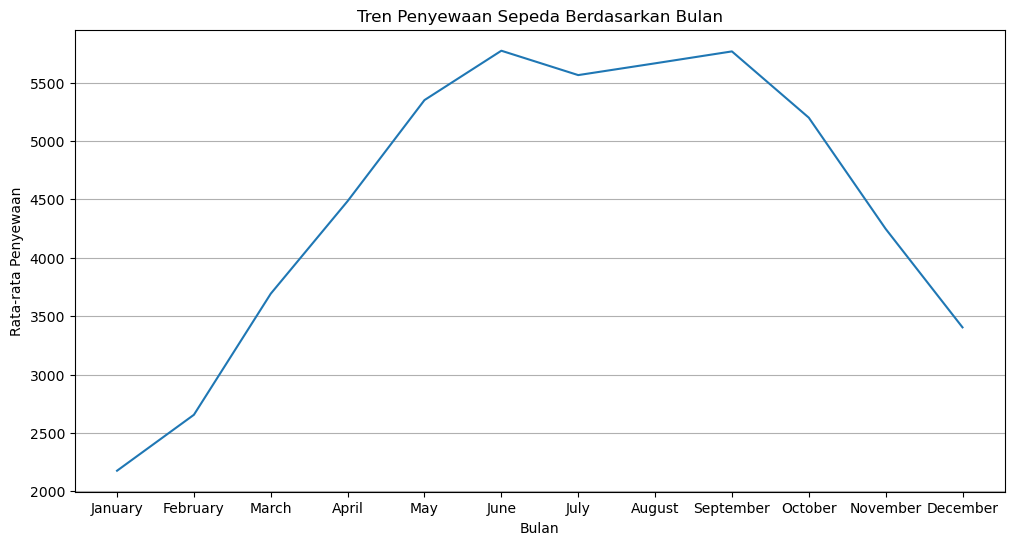

C:\Users\asus\AppData\Local\Temp\ipykernel_7164\2752162131.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='cnt', data=all_data_day, palette='viridis')


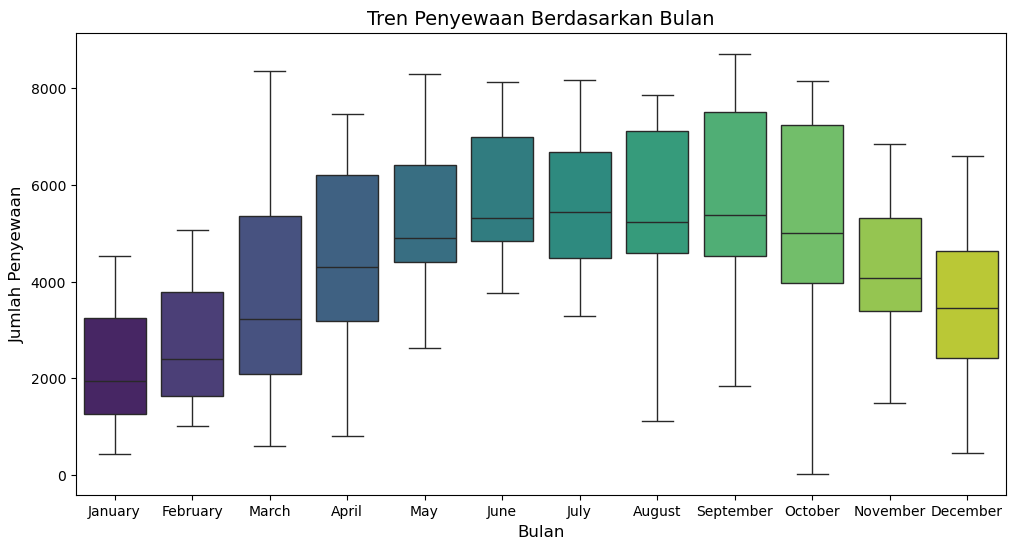

In [321]:
# Visualisasi tren penyewaan sepeda berdasarkan bulan
plt.figure(figsize=(12, 6))
sns.lineplot(data=tren_penyewaan_bulanan, x='month', y='cnt')
plt.title('Tren Penyewaan Sepeda Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Penyewaan')
plt.grid(axis='y')
plt.show()

# Menjelajahi tren penyewaan berdasarkan bulan
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='cnt', data=all_data_day, palette='viridis')
plt.title('Tren Penyewaan Berdasarkan Bulan', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah Penyewaan', fontsize=12)
plt.show()


**Insight berdasarkan grafik yang ditampilkan:**

- **Puncak Penyewaan pada Musim Panas**: Penyewaan sepeda mencapai puncaknya pada bulan Juli dan Agustus dengan rata-rata di atas 5500, menunjukkan bahwa musim panas adalah periode paling populer untuk aktivitas ini.

- **Penurunan Penyewaan di Musim Dingin**: Mulai September, tren penyewaan sepeda menurun tajam, dengan angka terendah pada bulan Desember, mengindikasikan pengaruh cuaca dingin terhadap minat masyarakat dalam menyewa sepeda.

In [322]:
# distribusi penyewaan sepeda berdasarkan hari
distribusi_penyewaan_harian = all_data_day.groupby('weekday').agg({
    'cnt': 'mean'
}).reindex(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

distribusi_penyewaan_harian

,cnt
weekday,
Sunday,4228.828571
Monday,4338.123810
Tuesday,4510.663462
Wednesday,4548.538462
Thursday,4667.259615
Friday,4690.288462
Saturday,4550.542857


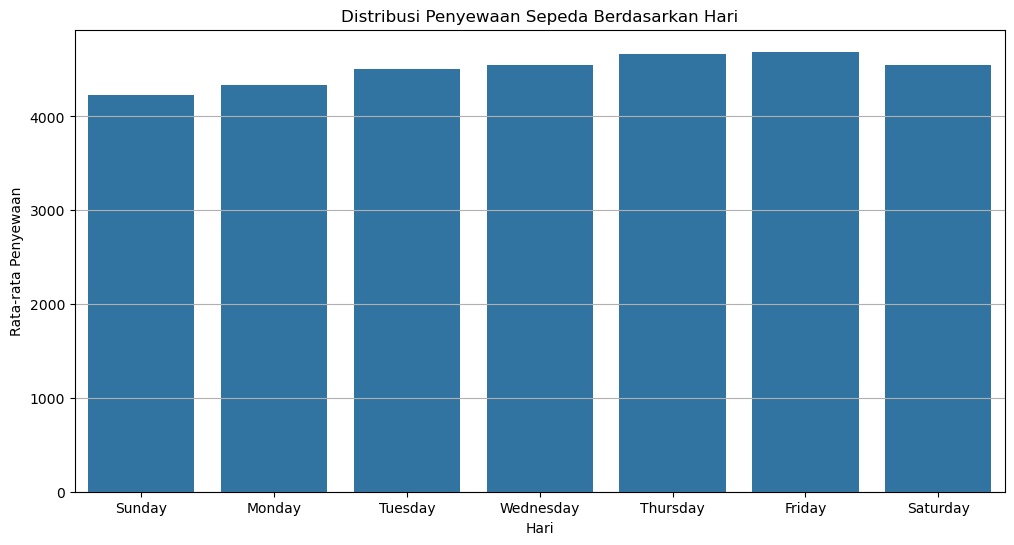

In [323]:
# Visualisasi distribusi penyewaan sepeda berdasarkan hari
plt.figure(figsize=(12, 6))
sns.barplot(data=distribusi_penyewaan_harian, x=distribusi_penyewaan_harian.index, y='cnt')
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Hari')
plt.xlabel('Hari')
plt.ylabel('Rata-rata Penyewaan')
plt.grid(axis='y')
plt.show()

**Insight berdasarkan grafik distribusi penyewaan sepeda berdasarkan hari:**

- **Distribusi Relatif Merata Sepanjang Minggu**: Penyewaan sepeda menunjukkan pola yang cukup konsisten setiap hari, dengan rata-rata di atas 4000 untuk semua hari, mengindikasikan bahwa layanan ini diminati tanpa tergantung hari tertentu.

- **Sedikit Peningkatan di Tengah Pekan**: Hari Rabu hingga Jumat menunjukkan sedikit peningkatan rata-rata penyewaan dibandingkan hari lainnya, mungkin karena aktivitas rutin atau preferensi pengguna untuk bersepeda di tengah minggu.

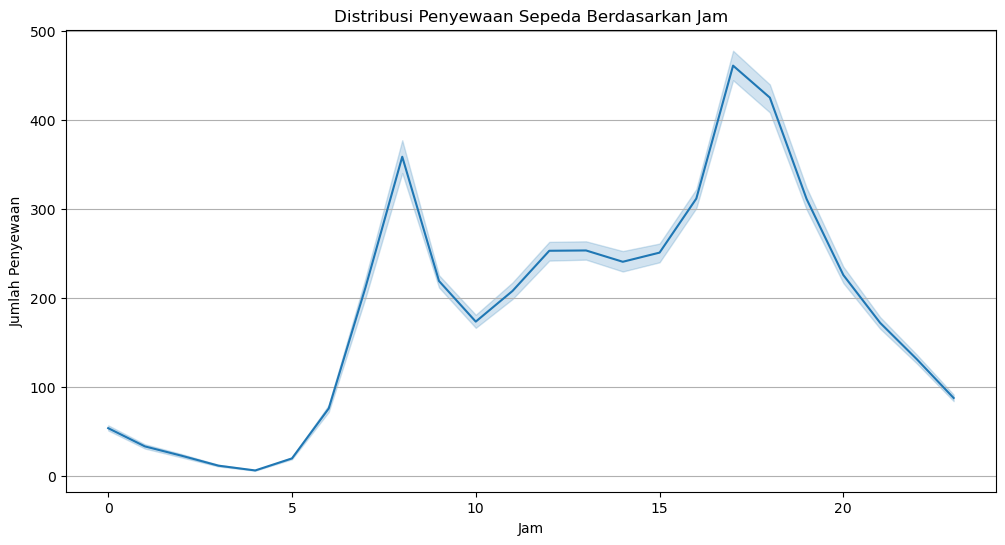

In [324]:
# Visualisasi distribusi penyewaan sepeda berdasarkan jam
plt.figure(figsize=(12, 6))
sns.lineplot(data=all_data_hour, x='hr', y='cnt')
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.grid(axis='y')
plt.show()


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penggunaan sepeda berdasarkan waktu (harian dan per jam)?

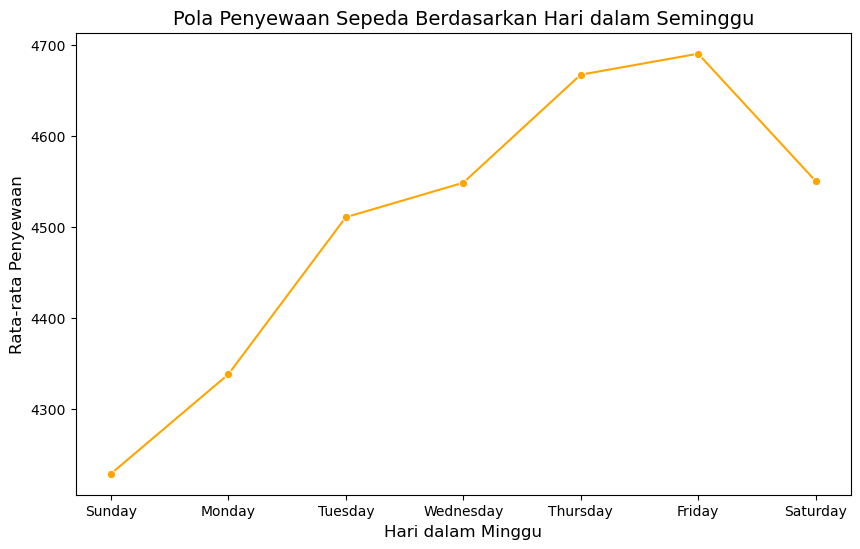

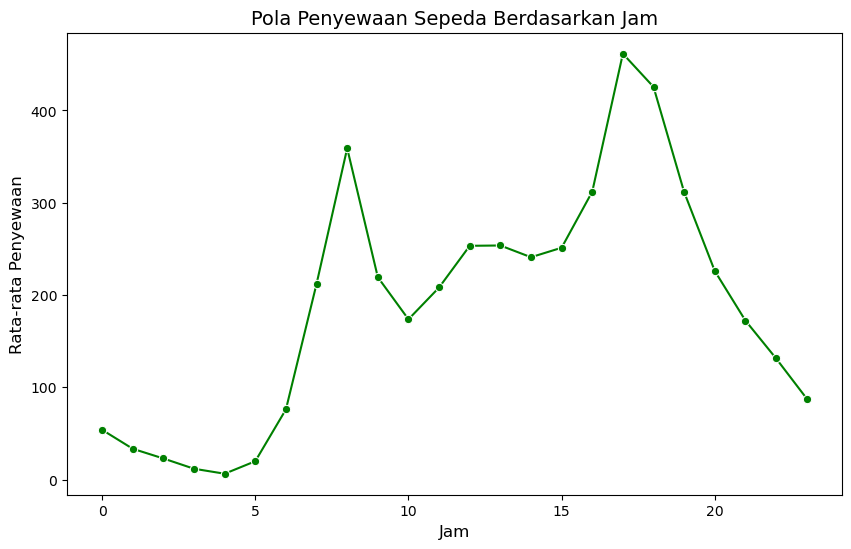

In [325]:
# Pola penyewaan harian
total_penyewaan_harian = all_data_day.groupby('weekday').agg({ 'cnt': 'mean' }).reindex(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.figure(figsize=(10, 6))
sns.lineplot(x='weekday', y='cnt', data=total_penyewaan_harian, marker='o', color='orange')
plt.title('Pola Penyewaan Sepeda Berdasarkan Hari dalam Seminggu', fontsize=14)
plt.xlabel('Hari dalam Minggu', fontsize=12)
plt.ylabel('Rata-rata Penyewaan', fontsize=12)
plt.show()

# Groupby dan hitung rata-rata
grouped_data = all_data_hour.groupby('hr')['cnt'].mean().reset_index()

# Plot data
plt.figure(figsize=(10, 6))
sns.lineplot(x='hr', y='cnt', data=grouped_data, marker='o', color='green')
plt.title('Pola Penyewaan Sepeda Berdasarkan Jam', fontsize=14)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Rata-rata Penyewaan', fontsize=12)
plt.show()


**Berikut adalah pola penggunaan sepeda berdasarkan waktu (harian dan per jam) yang ditemukan dari grafik:**

1. **Pola Harian**: Penggunaan sepeda cenderung rendah pada akhir pekan (Sabtu dan Minggu) dan meningkat secara bertahap sepanjang hari kerja, dengan puncaknya pada hari Jumat. Ini menunjukkan bahwa aktivitas penyewaan sepeda lebih banyak dilakukan selama hari kerja, kemungkinan terkait dengan perjalanan rutin atau aktivitas profesional.

2. **Pola Per Jam**: Penggunaan sepeda menunjukkan dua puncak utama, yaitu pada pagi hari sekitar pukul 07:00 dan sore hari sekitar pukul 17:00-18:00. Pola ini mengindikasikan bahwa sepeda sering digunakan untuk perjalanan kerja atau sekolah pada jam sibuk pagi dan sore hari. Di luar jam-jam ini, aktivitas penyewaan relatif stabil tetapi menurun tajam di malam hari.

### Pertanyaan 2: Apa faktor-faktor utama yang memengaruhi jumlah penyewaan sepeda?

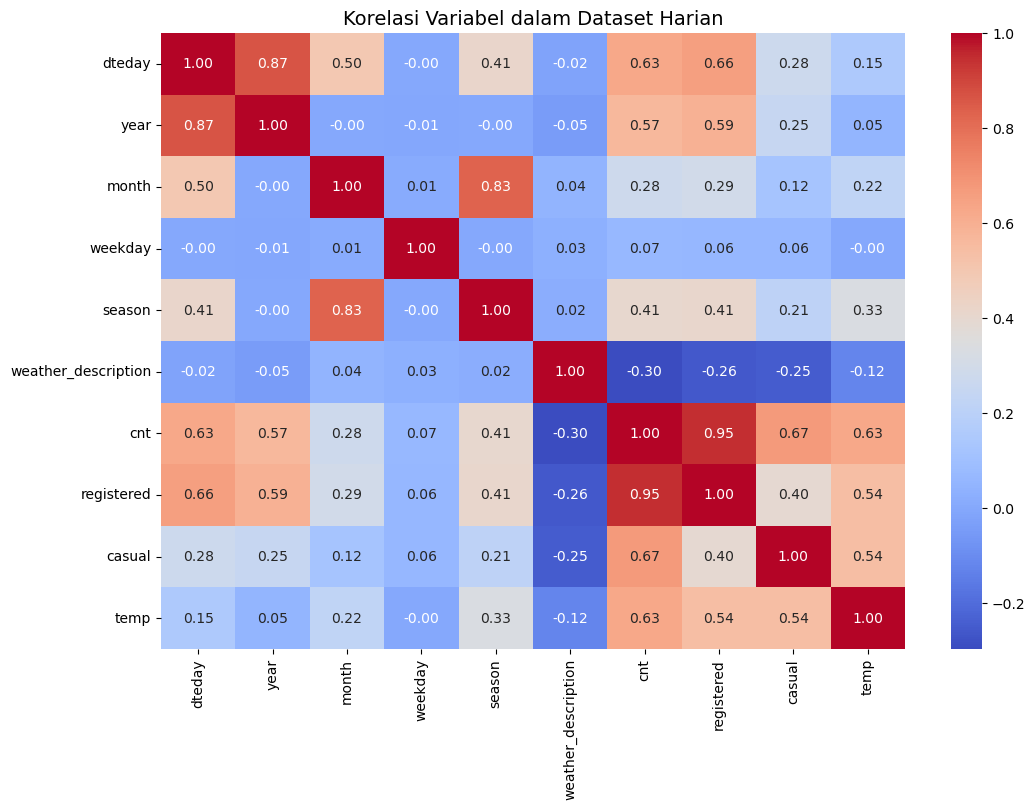

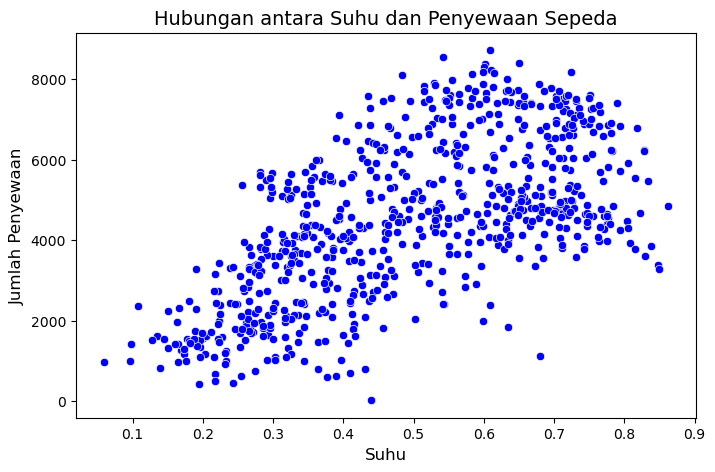

In [326]:
# Salin all_data_day ke dataframe baru untuk diproses
processed_data_day = all_data_day.copy()

# Mengembalikan nilai label yang sebelumnya kembali ke nilai numerik
processed_data_day['weekday'] = processed_data_day['weekday'].map({
    'Sunday': 0, 'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6 
})

processed_data_day['month'] = processed_data_day['month'].map({
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12 
})

processed_data_day['season'] = processed_data_day['season'].map({
    'Spring': 1, 'Summer': 2, 'Autumn': 3, 'Winter': 4
})

processed_data_day['weather_description'] = processed_data_day['weather_description'].map({
    'Clear': 1, 'Partly Cloudy': 2, 'Light Snow/Rain': 3, 'Severe Weather': 4
})

# Korelasi antara variabel
plt.figure(figsize=(12, 8))
sns.heatmap(processed_data_day.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Variabel dalam Dataset Harian', fontsize=14)
plt.show()

# Scatterplot suhu vs jumlah penyewaan
plt.figure(figsize=(8, 5))
sns.scatterplot(x='temp', y='cnt', data=processed_data_day, color='blue')
plt.title('Hubungan antara Suhu dan Penyewaan Sepeda', fontsize=14)
plt.xlabel('Suhu', fontsize=12)
plt.ylabel('Jumlah Penyewaan', fontsize=12)
plt.show()



**Berdasarkan grafik korelasi dan scatter plot, berikut adalah faktor utama yang memengaruhi jumlah penyewaan sepeda:**

1. **Suhu (Temperature)**: Terdapat korelasi positif yang cukup kuat antara suhu (temp) dan jumlah penyewaan sepeda (cnt). Scatter plot menunjukkan bahwa semakin tinggi suhu, semakin banyak penyewaan sepeda, dengan penyewaan tertinggi pada suhu sedang hingga hangat.

2. **Musim (Season)**: Korelasi positif antara musim (season) dan jumlah penyewaan menunjukkan bahwa musim juga menjadi faktor penting. Musim dengan cuaca lebih hangat cenderung meningkatkan penyewaan sepeda.

Faktor-faktor lain seperti kelembapan (hum) memiliki korelasi positif moderat, sedangkan kecepatan angin (windspeed) menunjukkan korelasi negatif, artinya angin kencang cenderung mengurangi jumlah penyewaan sepeda.

### Pertanyaan 3: Apakah cuaca memiliki pengaruh signifikan terhadap penggunaan sepeda?

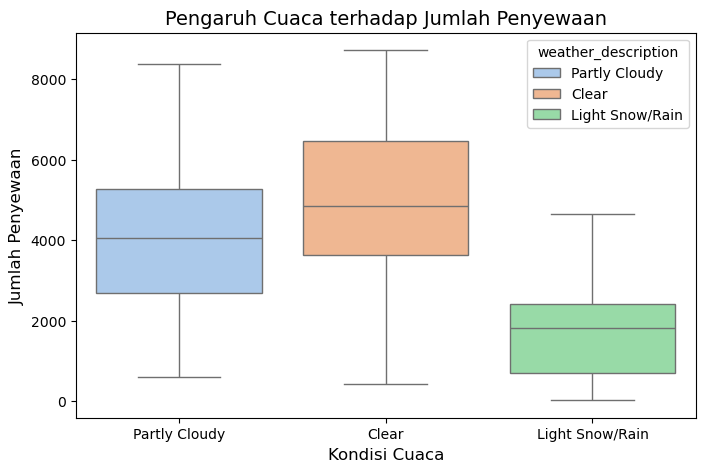

In [327]:
# # Mengubah nilai pada kolom 'weathersit' menjadi label sederhana
# day_data_cleaned['weathersit'] = day_data_cleaned['weathersit'].map({
#     1: 'Cerah',
#     2: 'Berkabut/Mendung',
#     3: 'Salju/Rintik Hujan',
#     4: 'Hujan Lebat/Salju Tebal'
# })


# Analisis pengaruh cuaca
plt.figure(figsize=(8, 5))
sns.boxplot(x='weather_description', y='cnt', data=all_data_day, hue='weather_description', palette='pastel', legend=True)
plt.title('Pengaruh Cuaca terhadap Jumlah Penyewaan', fontsize=14)
plt.xlabel('Kondisi Cuaca', fontsize=12)
plt.ylabel('Jumlah Penyewaan', fontsize=12)
plt.show()


Berdasarkan grafik boxplot yang menunjukkan hubungan antara **kondisi cuaca** (Berkabut/Mendung, Cerah, Salju/Rintik Hujan) dan **jumlah penyewaan sepeda**, beberapa insight dapat diambil:

1. **Kondisi cuaca cerah(clear)** memiliki median jumlah penyewaan sepeda tertinggi dibandingkan dengan kondisi lainnya. Ini menunjukkan bahwa cuaca cerah cenderung menarik lebih banyak pengguna sepeda.
2. **Kondisi salju ringan/rintik hujan** memiliki jumlah penyewaan sepeda paling rendah, baik dari segi median maupun persebaran data. Hal ini menunjukkan bahwa kondisi cuaca buruk dapat mengurangi minat pengguna untuk menyewa sepeda.
3. Persebaran jumlah penyewaan pada kondisi **berkabut/mendung** berada di antara kedua kondisi lainnya, namun masih lebih rendah dibandingkan cuaca cerah.

**Kesimpulan:**
Cuaca tampaknya memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda. Kondisi cerah secara konsisten dikaitkan dengan jumlah penyewaan yang lebih tinggi, sementara kondisi hujan atau salju cenderung mengurangi penggunaan sepeda.

## Analisis Lanjutan
### Clustering Analysis (Tanpa ML)

In [328]:
# Menentukan cluster berdasarkan suhu
all_data_day['temp_cluster'] = pd.cut(
    all_data_day['temp'], 
    bins=[0, 0.3, 0.6, 1], 
    labels=['Rendah', 'Sedang', 'Tinggi']
)

# Menganalisis rata-rata penyewaan untuk setiap cluster
cluster_summary = all_data_day.groupby('temp_cluster')['cnt'].mean()
cluster_summary


C:\Users\asus\AppData\Local\Temp\ipykernel_7164\2445528903.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_summary = all_data_day.groupby('temp_cluster')['cnt'].mean()


temp_cluster
Rendah    2381.214815
Sedang    4488.178363
Tinggi    5654.559055
Name: cnt, dtype: float64

C:\Users\asus\AppData\Local\Temp\ipykernel_7164\2565205674.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


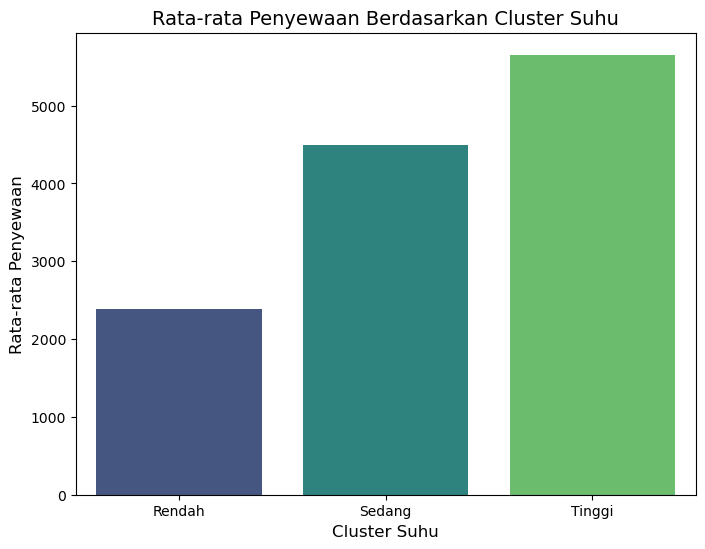

In [329]:
# Membuat bar plot rata-rata penyewaan berdasarkan cluster suhu
plt.figure(figsize=(8, 6))
sns.barplot(
    x=cluster_summary.index, 
    y=cluster_summary.values, 
    palette='viridis'
)

plt.title('Rata-rata Penyewaan Berdasarkan Cluster Suhu', fontsize=14)
plt.xlabel('Cluster Suhu', fontsize=12)
plt.ylabel('Rata-rata Penyewaan', fontsize=12)

plt.show()

**Insight dari hasil pengelompokan berdasarkan suhu (temp_cluster):**  

1. **Cluster Rendah (Suhu: 0 - 0.3)**  
   - Penyewaan rata-rata: **2,381** sepeda.  
   - Suhu yang rendah menunjukkan aktivitas penyewaan yang lebih sedikit, kemungkinan karena kondisi dingin yang kurang nyaman untuk bersepeda.  

2. **Cluster Sedang (Suhu: 0.3 - 0.6)**  
   - Penyewaan rata-rata: **4,488** sepeda.  
   - Aktivitas penyewaan meningkat signifikan pada suhu sedang, menunjukkan kenyamanan yang lebih tinggi untuk bersepeda.  

3. **Cluster Tinggi (Suhu: 0.6 - 1.0)**  
   - Penyewaan rata-rata: **5,654** sepeda.  
   - Pada suhu tinggi, penyewaan mencapai puncaknya. Hal ini dapat disebabkan oleh cuaca yang hangat, yang ideal untuk aktivitas luar ruangan.  

**Kesimpulan:**  
Ada hubungan positif antara suhu dan jumlah penyewaan sepeda. Suhu yang lebih tinggi cenderung meningkatkan aktivitas penyewaan, tetapi untuk suhu sangat rendah, penyewaan menurun drastis. Strategi seperti promosi untuk hari-hari dingin dapat membantu meningkatkan penyewaan di cluster rendah.

## Conclusion

**Conclusion: Pola dan Faktor yang Mempengaruhi Penggunaan Sepeda**

Berdasarkan analisis terhadap pola penggunaan sepeda dan faktor-faktor yang memengaruhinya, berikut kesimpulan yang dapat diambil:

1. **Pola Penggunaan Sepeda Berdasarkan Waktu**  
   Penggunaan sepeda menunjukkan pola yang jelas berdasarkan waktu. Pada skala harian, aktivitas penyewaan sepeda lebih tinggi selama hari kerja, dengan puncaknya pada hari Jumat, dan menurun pada akhir pekan. Pada skala jam, terdapat dua puncak utama pada pagi hari (sekitar pukul 07:00) dan sore hari (sekitar pukul 17:00-18:00), mengindikasikan penggunaan sepeda yang signifikan untuk perjalanan kerja atau sekolah.

2. **Faktor Utama yang Mempengaruhi Penggunaan Sepeda**  
   - **Suhu (Temperature)** memiliki pengaruh positif yang kuat terhadap jumlah penyewaan. Penyewaan tertinggi terjadi pada suhu yang hangat dan nyaman.  
   - **Musim (Season)** juga memengaruhi, dengan musim hangat meningkatkan aktivitas penyewaan.  
   - **Kelembapan (Humidity)** memiliki pengaruh moderat, sementara kecepatan angin (Windspeed) menunjukkan pengaruh negatif, mengurangi jumlah penyewaan saat angin lebih kencang.

3. **Pengaruh Cuaca terhadap Penggunaan Sepeda**  
   Cuaca memiliki dampak signifikan pada jumlah penyewaan sepeda. Kondisi cuaca cerah mendorong jumlah penyewaan tertinggi, sementara kondisi hujan atau salju menyebabkan penurunan drastis dalam aktivitas penyewaan. Cuaca mendung menunjukkan aktivitas yang moderat tetapi tetap lebih rendah dibandingkan cuaca cerah.

**Kesimpulan Utama:**  
Penggunaan sepeda sangat dipengaruhi oleh pola waktu (harian dan per jam), serta faktor-faktor lingkungan seperti suhu, musim, dan cuaca. Kondisi cerah dan hangat secara konsisten mendorong lebih banyak aktivitas penyewaan sepeda, sementara cuaca buruk dan angin kencang mengurangi minat pengguna. Untuk meningkatkan penggunaan sepeda, manajemen penyewaan dapat mempertimbangkan faktor cuaca, musim, dan waktu dalam menyusun strategi operasional.